# Postdam PM2.5 Forecasting 

Between 2013 and 2023, data collected by DEBB021 was used. 

To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import eda as eda
import model_base as mb
from pandas.plotting import autocorrelation_plot

## Data Exploration

* Load Data
* Merge
* Filter and Clean


In [2]:
df_pm25 = pd.read_csv('../../data/PM2.5_DE_DEBB021.csv')
df_pm10 = pd.read_csv('../../data/PM10_DE_DEBB021.csv')
df_no2 = pd.read_csv('../../data/NO2_DE_DEBB021.csv')
df_o3 = pd.read_csv('../../data/O3_DE_DEBB021.csv')
df_so2 = pd.read_csv('../../data/SO2_DE_DEBB021.csv')

df_pm25.head()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 00:00:00,2013-01-01 01:00:00,71.04,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
1,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 01:00:00,2013-01-01 02:00:00,20.52,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
2,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 02:00:00,2013-01-01 03:00:00,9.56,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
3,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 03:00:00,2013-01-01 04:00:00,9.45,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90
4,DE/SPO.DE_DEBB021_PM2_dataGroup1,6001,2013-01-01 04:00:00,2013-01-01 05:00:00,13.02,ug.m-3,hour,1,1,2014-09-23 12:18:11,NaN,dcc86bec-211d-4d9f-b0fb-6e37766b0f90


In [3]:
df_pm25.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,6001.000000,0.000000,6001.0,6001.0,6001.0,6001.0,6001.0
Value,87648.0,10.192952,54.500614,-999.0,6.0,10.0,17.0,194.0
Validity,87648.0,1.005545,0.149514,-1.0,1.0,1.0,1.0,2.0
Verification,87648.0,1.000011,0.003378,1.0,1.0,1.0,1.0,2.0
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Samplingpoint     87648 non-null  object 
 1   Pollutant         87648 non-null  int64  
 2   Start             87648 non-null  object 
 3   End               87648 non-null  object 
 4   Value             87648 non-null  float64
 5   Unit              87648 non-null  object 
 6   AggType           87648 non-null  object 
 7   Validity          87648 non-null  int64  
 8   Verification      87648 non-null  int64  
 9   ResultTime        87648 non-null  object 
 10  DataCapture       0 non-null      float64
 11  FkObservationLog  87648 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 8.0+ MB


In [5]:
df_pm10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,5.000000,0.000000,5.0,5.00,5.00000,5.0,5.0
Value,87648.0,14.848907,56.695262,-999.0,9.26,14.84908,23.2,705.3
Validity,87648.0,0.997456,0.123482,-1.0,1.00,1.00000,1.0,2.0
Verification,87648.0,1.000011,0.003378,1.0,1.00,1.00000,1.0,2.0
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_no2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,8.000000,0.000000,8.0,8.00,8.00,8.000000,8.00
Value,87648.0,13.725483,51.692710,-999.0,7.86,12.92,21.194304,134.09
Validity,87648.0,1.029310,0.207938,-1.0,1.00,1.00,1.000000,2.00
Verification,87648.0,1.000011,0.003378,1.0,1.00,1.00,1.000000,2.00
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_o3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,7.000000,0.000000,7.0,7.00,7.00,7.0,7.00
Value,87648.0,47.729893,66.412839,-999.0,29.03,49.93,69.9,189.88
Validity,87648.0,1.031124,0.222552,-1.0,1.00,1.00,1.0,2.00
Verification,87648.0,1.000011,0.003378,1.0,1.00,1.00,1.0,2.00
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_so2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pollutant,87648.0,1.000000,0.000000,1.0,1.0,1.00,1.00,1.00
Value,87648.0,-1.665583,58.170432,-999.0,1.3,1.33,1.33,23.55
Validity,87648.0,1.652439,0.497088,-1.0,1.0,2.00,2.00,2.00
Verification,87648.0,1.000011,0.003378,1.0,1.0,1.00,1.00,2.00
DataCapture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Rename the columns for merging and delete unused columns

df_pm25 = eda.rename_df_columns(df_pm25, 'PM2.5')
df_pm25 = eda.drop_unused_df_columns(df_pm25)
df_pm25 = df_pm25[
    ['Start', 'End', 'PM2.5-Pollutant', 'PM2.5-Value', 'PM2.5-Unit', 'PM2.5-Validity', 'PM2.5-Verification']]
df_pm25.head()

,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification
0,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1
1,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1
2,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1
3,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1
4,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1


In [10]:
df_pm10 = eda.rename_df_columns(df_pm10, 'PM10')
df_pm10 = eda.drop_unused_df_columns(df_pm10)
df_pm10.head()

,PM10-Pollutant,Start,End,PM10-Value,PM10-Unit,PM10-Validity,PM10-Verification
0,5,2013-01-01 00:00:00,2013-01-01 01:00:00,88.96,ug.m-3,1,1
1,5,2013-01-01 01:00:00,2013-01-01 02:00:00,25.17,ug.m-3,1,1
2,5,2013-01-01 02:00:00,2013-01-01 03:00:00,11.97,ug.m-3,1,1
3,5,2013-01-01 03:00:00,2013-01-01 04:00:00,11.73,ug.m-3,1,1
4,5,2013-01-01 04:00:00,2013-01-01 05:00:00,15.88,ug.m-3,1,1


In [11]:
df_no2 = eda.rename_df_columns(df_no2, 'NO2')
df_no2 = eda.drop_unused_df_columns(df_no2)
df_no2.head()

,NO2-Pollutant,Start,End,NO2-Value,NO2-Unit,NO2-Validity,NO2-Verification
0,8,2013-01-01 00:00:00,2013-01-01 01:00:00,22.61,ug.m-3,1,1
1,8,2013-01-01 01:00:00,2013-01-01 02:00:00,9.39,ug.m-3,1,1
2,8,2013-01-01 02:00:00,2013-01-01 03:00:00,6.13,ug.m-3,1,1
3,8,2013-01-01 03:00:00,2013-01-01 04:00:00,5.61,ug.m-3,1,1
4,8,2013-01-01 04:00:00,2013-01-01 05:00:00,5.29,ug.m-3,1,1


In [12]:
df_o3 = eda.rename_df_columns(df_o3, 'O3')
df_o3 = eda.drop_unused_df_columns(df_o3)
df_o3.head()

,O3-Pollutant,Start,End,O3-Value,O3-Unit,O3-Validity,O3-Verification
0,7,2013-01-01 00:00:00,2013-01-01 01:00:00,43.17,ug.m-3,1,1
1,7,2013-01-01 01:00:00,2013-01-01 02:00:00,57.15,ug.m-3,1,1
2,7,2013-01-01 02:00:00,2013-01-01 03:00:00,63.31,ug.m-3,1,1
3,7,2013-01-01 03:00:00,2013-01-01 04:00:00,63.18,ug.m-3,1,1
4,7,2013-01-01 04:00:00,2013-01-01 05:00:00,61.70,ug.m-3,1,1


In [13]:
df_so2 = eda.rename_df_columns(df_so2, 'SO2')
df_so2 = eda.drop_unused_df_columns(df_so2)
df_so2.head()

,SO2-Pollutant,Start,End,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1,2013-01-01 00:00:00,2013-01-01 01:00:00,12.18,ug.m-3,1,1
1,1,2013-01-01 01:00:00,2013-01-01 02:00:00,4.65,ug.m-3,1,1
2,1,2013-01-01 02:00:00,2013-01-01 03:00:00,1.33,ug.m-3,1,1
3,1,2013-01-01 03:00:00,2013-01-01 04:00:00,1.33,ug.m-3,1,1
4,1,2013-01-01 04:00:00,2013-01-01 05:00:00,1.33,ug.m-3,1,1


In [14]:
# Use merge to combine DataFrames on start_time and end_time
df_merged = eda.merge_dataframes_on_columns([df_pm25, df_pm10, df_no2, df_o3, df_so2])
df_merged.head()

,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [15]:
df_merged.to_csv('../../data/MERGED_DE_DEBB021.csv', index=False)
df_merged.head()

,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


## Missing data

### KNN regression 
* KNN, or k-Nearest Neighbors, is a simple and intuitive supervised machine learning algorithm used for classification and regression tasks. It's a type of instance-based learning, where the model essentially memorizes the training instances and uses them for prediction without building an explicit underlying model.
* For Regression: Given a new observation, the algorithm looks at the 'k' nearest training observations and returns the average of their output values as the prediction.

* Don't remove invalid PM2.5 rows from the merged data set, run KNN to fill in missing data
* Replace invalidated pollutants value is -999.0, replace -999.0 with nan for the KNN algorithm.

In [16]:
# df_merged = df_merged[df_merged['PM2.5-Validity'] >= 1]
df_merged = eda.impute_missing_with_knn(df_merged, ['PM2.5-Value', 'PM10-Value', 'NO2-Value', 'O3-Value', 'SO2-Value'])

In [17]:
df_merged = eda.prepare_datetime_and_reorder(df_merged, ['Start', 'End'])

df_merged = eda.drop_df_columns(df_merged,['Start', 'End'])

/Users/tugcekonuklar/Master/2023-IRP/github/irp-air-pollution/src/eda.py:290: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[timestamp_col] = df[col].astype('int64') // 10 ** 9


In [18]:
df_merged.to_csv('../../data/CLEAN_MERGED_DE_DEBB021.csv', index=False)
df_merged.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start_Timestamp,87648.0,1.514763e+09,9.108699e+07,1.356998e+09,1.435881e+09,1.514763e+09,1.593645e+09,1.672528e+09
End_Timestamp,87648.0,1.514767e+09,9.108699e+07,1.357002e+09,1.435884e+09,1.514767e+09,1.593649e+09,1.672531e+09
PM2.5-Pollutant,87648.0,6.001000e+03,0.000000e+00,6.001000e+03,6.001000e+03,6.001000e+03,6.001000e+03,6.001000e+03
PM2.5-Value,87648.0,1.303341e+01,1.018415e+01,7.700000e-01,6.000000e+00,1.003000e+01,1.700000e+01,1.940000e+02
PM2.5-Validity,87648.0,1.005545e+00,1.495142e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM2.5-Verification,87648.0,1.000011e+00,3.377762e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM10-Pollutant,87648.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
PM10-Value,87648.0,1.786535e+01,1.249411e+01,8.000000e-01,9.300000e+00,1.491000e+01,2.320000e+01,7.053000e+02
PM10-Validity,87648.0,9.974557e-01,1.234824e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM10-Verification,87648.0,1.000011e+00,3.377762e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [19]:
# set Start Date as an index
mb.set_start_index(df_merged, 'Start_Timestamp')

df_merged.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [20]:
df_merged.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [21]:
# Plots to show the data

# TODO: Commented out because of performance
# plot_timeseries(df_merged, 'PM2.5-Value', ylabel="PM2.5", title="PM2.5 Over Time")

## Time Series Decomposition Chart¶
Plot to see the trends and seasonality of data
Plot autocorrelation plot


<Figure size 2160x7200 with 0 Axes>

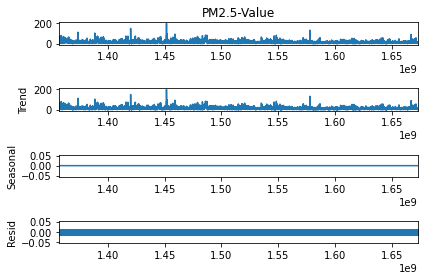

In [22]:
# Time series Decomposition chart

# TODO: Commented out because of performance
eda.plot_time_series_decomposition(df_merged, 'PM2.5-Value')

In [23]:
# Auto correlation plot
# df2 = df_merged[['PM2.5-Value']]
# autocorrelation_plot(df2)

## Stationary of Data

### ADF (Agumented Dicky Fuller) Test and Rolling Statistics
There are two primary way to determine whether a given time series is stationary.

* Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).
* Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics The null hypothesis is data is not stationary. if p<0.05 means null hypothesis rejected. It means data is stationary. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

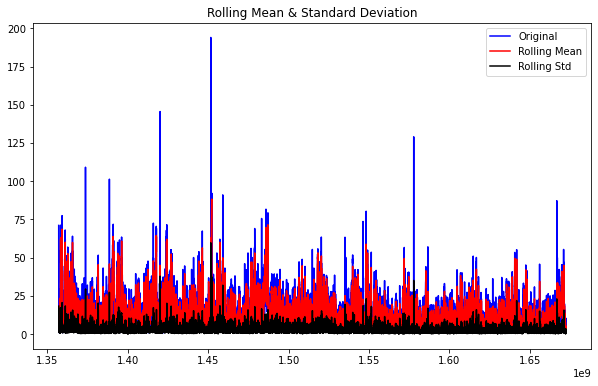

{'ADF Statistic': -18.003748889579477,
 'p-value': 2.7288434744755993e-30,
 'Critical Values': {'1%': -3.4304246679265242,
  '5%': -2.8615730020021357,
  '10%': -2.5667875658199057}}

In [24]:
# Run ADF test to see stationary of data
eda.get_stationarity(df_merged[['PM2.5-Value']], visualize=True)